# diases
> 427084000': sinus tachycardia 
> '426761007': supraventricular tachycardia
> '427393009' sinus arrhythmia

In [1]:
!pip install --upgrade pip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 21.7 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2


In [2]:
!pip install scikit-learn==1.6.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 91.7 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
category-encoders 2.7.0 requires scikit-learn<1.6.0,>=1.0.0, but you have scikit-learn 1.6.1 which is incompatible.
cesium 0.12.4 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.


In [3]:
import sklearn 
print(sklearn.__version__)


1.6.1


In [4]:
import pandas as pd
from tqdm import tqdm  # optional: for progress bar

origin_comp_df = pd.read_csv("/kaggle/input/merge-comp-2021/ecg-comp-2021-signals-features.csv")

origin_comp_df.iloc[0]

record_name                        training/ningbo/g34/JS44560
Duree_QRS_ms_mean                                   166.117647
Duree_QRS_ms_std                                     33.320193
Duree_QRS_ms_min                                         140.0
Duree_QRS_ms_max                                         272.0
                                         ...                  
std_Intervalle_RR_ms                                  6.961801
Age                                                       40.0
Sex                                                       Male
Dx                      ['164934002', '427084000', '55827005']
Class                                                        2
Name: 0, Length: 100, dtype: object

In [5]:
origin_comp_df.columns

Index(['record_name', 'Duree_QRS_ms_mean', 'Duree_QRS_ms_std',
       'Duree_QRS_ms_min', 'Duree_QRS_ms_max', 'Duree_P_ms_mean',
       'Duree_P_ms_std', 'Duree_P_ms_min', 'Duree_P_ms_max', 'Duree_T_ms_mean',
       'Duree_T_ms_std', 'Duree_T_ms_min', 'Duree_T_ms_max',
       'Intervalle_QT_ms_mean', 'Intervalle_QT_ms_std', 'Intervalle_QT_ms_min',
       'Intervalle_QT_ms_max', 'Intervalle_PR_ms_mean', 'Intervalle_PR_ms_std',
       'Intervalle_PR_ms_min', 'Intervalle_PR_ms_max', 'Intervalle_ST_ms_mean',
       'Intervalle_ST_ms_std', 'Intervalle_ST_ms_min', 'Intervalle_ST_ms_max',
       'Amplitude_P_mean', 'Amplitude_P_std', 'Amplitude_P_min',
       'Amplitude_P_max', 'Amplitude_Q_mean', 'Amplitude_Q_std',
       'Amplitude_Q_min', 'Amplitude_Q_max', 'Amplitude_R_mean',
       'Amplitude_R_std', 'Amplitude_R_min', 'Amplitude_R_max',
       'Amplitude_S_mean', 'Amplitude_S_std', 'Amplitude_S_min',
       'Amplitude_S_max', 'Amplitude_T_mean', 'Amplitude_T_std',
       'Amplitude_T_mi

In [6]:
origin_comp_df["Class"].value_counts()

Class
2    40704
0    28967
1    18559
Name: count, dtype: int64

# MIT-BIH norm

In [7]:
origin_mitbih_df = pd.read_csv("/kaggle/input/merge-norm-mitbih/norm-mit-signals-features.csv") 

In [8]:
origin_mitbih_df["Class"].value_counts()


Class
0    20298
Name: count, dtype: int64

# ecg arr

In [9]:
origin_ecgarr_df = pd.read_csv("/kaggle/input/merge-ecg-arrhythmia/ecg-arr-signals-features.csv") 

origin_ecgarr_df["Class"].value_counts()


Class
2    8342
1    6810
0    3301
Name: count, dtype: int64

# challenge 2017


In [10]:
origin_ch2017_df = pd.read_csv("/kaggle/input/merge-challenge-2017/challenge-2017-signals-features.csv") 
len(origin_ch2017_df)


8526

In [11]:
origin_ch2017_df['Class'] = origin_ch2017_df['type'].apply(lambda x: 0 if x == 'N' else 2)
origin_ch2017_df = origin_ch2017_df.drop(columns=['type'])

In [12]:
origin_ch2017_df["Class"].value_counts()

Class
0    5075
2    3451
Name: count, dtype: int64

# full data

In [13]:
arr3 = [origin_comp_df,origin_mitbih_df]
#arr3 = [origin_comp_df]

sign_df = pd.concat(arr3, ignore_index=True)

In [14]:
arr4 = [origin_comp_df,origin_mitbih_df,origin_ecgarr_df,origin_ch2017_df]
#arr3 = [origin_comp_df]

sign_df2 = pd.concat(arr4, ignore_index=True)

In [15]:
# check null except age and sex
mask = sign_df2.drop(columns=["Age", "Sex"]).isnull().any(axis=1)
df_with_nulls = sign_df2[mask]
df_with_nulls

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,record_name,Duree_QRS_ms_mean,Duree_QRS_ms_std,Duree_QRS_ms_min,Duree_QRS_ms_max,Duree_P_ms_mean,Duree_P_ms_std,Duree_P_ms_min,Duree_P_ms_max,Duree_T_ms_mean,...,percent_T_inversion,QRS_prolonged_ratio,QT_prolonged_ratio,PVC_ratio,num_beats,std_Intervalle_RR_ms,Age,Sex,Dx,Class
60,training/ningbo/g34/JS44620,360.000000,NaN,360.0,360.0,96.000000,NaN,96.0,96.0,340.000000,...,1.000000,1.0,1.000000,0.000000,1,NaN,23.0,Male,['427084000'],2
908,training/ningbo/g35/JS45471,258.000000,268.700577,68.0,448.0,292.000000,118.793939,208.0,376.0,424.000000,...,1.000000,0.5,0.500000,0.000000,2,NaN,50.0,Female,['164896001'],2
981,training/ningbo/g35/JS45545,142.000000,82.024387,84.0,200.0,224.000000,0.000000,224.0,224.0,174.000000,...,0.000000,0.5,0.500000,0.000000,2,NaN,37.0,Male,['425856008'],2
1215,training/ningbo/g4/JS13873,240.000000,NaN,240.0,240.0,296.000000,NaN,296.0,296.0,176.000000,...,1.000000,1.0,1.000000,0.000000,1,NaN,67.0,Female,"['164890007', '39732003']",2
1672,training/ningbo/g4/JS14330,336.000000,NaN,336.0,336.0,0.000000,NaN,0.0,0.0,280.000000,...,1.000000,1.0,1.000000,0.000000,1,NaN,80.0,Male,"['164890007', '10370003']",2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135502,A08/A08524,183.000000,26.239591,148.0,260.0,90.875000,121.781335,0.0,472.0,174.375000,...,0.500000,1.0,0.468750,0.000000,32,224.230757,NaN,NaN,NaN,0
135503,A08/A08525,236.666667,28.978265,136.0,296.0,48.476190,62.345707,0.0,224.0,189.047619,...,0.904762,1.0,0.166667,0.142857,42,122.062599,NaN,NaN,NaN,2
135504,A08/A08526,187.047619,34.801845,140.0,252.0,155.238095,59.298258,80.0,368.0,190.761905,...,0.047619,1.0,0.190476,0.000000,42,63.126509,NaN,NaN,NaN,0
135505,A08/A08527,242.956522,63.969075,140.0,428.0,118.869565,74.755485,0.0,248.0,127.304348,...,0.282609,1.0,0.217391,0.021739,46,148.400931,NaN,NaN,NaN,0


In [16]:
sign_df2["Class"].value_counts()

Class
0    57641
2    52497
1    25369
Name: count, dtype: int64

In [17]:
origin_comp_df.iloc[0]

record_name                        training/ningbo/g34/JS44560
Duree_QRS_ms_mean                                   166.117647
Duree_QRS_ms_std                                     33.320193
Duree_QRS_ms_min                                         140.0
Duree_QRS_ms_max                                         272.0
                                         ...                  
std_Intervalle_RR_ms                                  6.961801
Age                                                       40.0
Sex                                                       Male
Dx                      ['164934002', '427084000', '55827005']
Class                                                        2
Name: 0, Length: 100, dtype: object

# diases 1 : 

In [18]:
from collections import Counter
from itertools import chain
import ast
# Assuming df["dx"] contains lists
arr5 = [origin_comp_df,origin_mitbih_df,origin_ecgarr_df]
sign_df3 = pd.concat(arr5, ignore_index=True)

# If "Dx" entries are strings like "[164934002, 427084000]"
parsed_dx_lists = sign_df3["Dx"].apply(ast.literal_eval)

# Flatten and count
code_counts = Counter(chain.from_iterable(parsed_dx_lists))

# Print how many times 164934002 appears
print(code_counts)

Counter({'426783006': 52566, '426177001': 25733, '164934002': 14606, '427084000': 12605, '164890007': 11671, '39732003': 8258, '55827005': 7622, '55930002': 6757, '164865005': 6187, '164889003': 5999, '428750005': 5188, '59931005': 5154, '427393009': 4819, '164873001': 4653, '429622005': 4311, '270492004': 4016, '284470004': 3571, '164951009': 3389, '59118001': 3318, '164930006': 2605, '164861001': 2559, '164917005': 2520, '445118002': 2346, '713427006': 2204, '698252002': 2083, '111975006': 2073, '251146004': 2032, '713426002': 1955, '10370003': 1952, '164884008': 1943, '427172004': 1734, '47665007': 1644, '164909002': 1389, '67741000119109': 1300, '164867002': 1167, '426761007': 1060, '425623009': 1043, '61721007': 916, '365413008': 888, '17338001': 776, '164931005': 715, '6374002': 678, '425419005': 670, '428417006': 646, '54329005': 496, '713422000': 461, '164947007': 419, '233917008': 417, '89792004': 386, '426434006': 325, '733534002': 311, '106068003': 311, '251223006': 307, '42

In [19]:
sign_df3["Class"].value_counts()


Class
0    52566
2    49046
1    25369
Name: count, dtype: int64

In [20]:
sign_df3_ab = sign_df3[sign_df3["Class"] != 0]
print(len(sign_df3_ab))


74415


In [21]:
sign_df3_ab["Class"] = None

/tmp/ipykernel_13/1236508171.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sign_df3_ab["Class"] = None


In [22]:
sign_df3_ab["Class"].value_counts()


Series([], Name: count, dtype: int64)

In [23]:
sign_df3_ab["Dx"] = sign_df3_ab["Dx"].apply(ast.literal_eval)

# Define a function to classify based on Dx codes
def assign_class(dx_list):
    if "427084000" in dx_list:
        return 0
    else:
        return 1  # Or some default value

# Apply the function to assign the Class column
sign_df3_ab["Class"] = sign_df3_ab["Dx"].apply(assign_class)

/tmp/ipykernel_13/362037583.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sign_df3_ab["Dx"] = sign_df3_ab["Dx"].apply(ast.literal_eval)
/tmp/ipykernel_13/362037583.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sign_df3_ab["Class"] = sign_df3_ab["Dx"].apply(assign_class)


In [24]:
sign_df3_ab["Class"].value_counts()


Class
1    62046
0    12369
Name: count, dtype: int64

# training

In [25]:

df_full = sign_df3_ab
df_full["Class"].value_counts()


Class
1    62046
0    12369
Name: count, dtype: int64

In [26]:

mask = df_full.drop(columns=["Age", "Sex"]).isnull().any(axis=1)
df_with_nulls = df_full[mask]

In [27]:

# Drop those rows from the original dataframe
df_full = df_full[~mask].reset_index(drop=True)

df_full["Class"].value_counts()

Class
1    62003
0    12366
Name: count, dtype: int64

In [28]:

df_balanced = df_full

In [29]:
from sklearn.utils import resample

df = df_full
# Separate the two classes
df_major = df[df['Class'] == 1]
df_minor = df[df['Class'] == 0]

# Downsample the majority class
df_major_downsampled = resample(df_major,
                                replace=False,     # without replacement
                                n_samples=len(df_minor),
                                random_state=42)   # reproducibility

# Combine balanced dataset
df_balanced = pd.concat([df_major_downsampled, df_minor])
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# balancing

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score , confusion_matrix

# Assuming df_full already has the 'is_normal' column for classification
# Define X and y
X = df_balanced.drop(columns=['record_name','Sex','Age',"Dx",'Class'])  # Features: exclude 'is_normal' column

y = df_balanced['Class']  # Target: 'is_normal'
print(y.value_counts())
print(X.columns)
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



Class
1    12366
0    12366
Name: count, dtype: int64
Index(['Duree_QRS_ms_mean', 'Duree_QRS_ms_std', 'Duree_QRS_ms_min',
       'Duree_QRS_ms_max', 'Duree_P_ms_mean', 'Duree_P_ms_std',
       'Duree_P_ms_min', 'Duree_P_ms_max', 'Duree_T_ms_mean', 'Duree_T_ms_std',
       'Duree_T_ms_min', 'Duree_T_ms_max', 'Intervalle_QT_ms_mean',
       'Intervalle_QT_ms_std', 'Intervalle_QT_ms_min', 'Intervalle_QT_ms_max',
       'Intervalle_PR_ms_mean', 'Intervalle_PR_ms_std', 'Intervalle_PR_ms_min',
       'Intervalle_PR_ms_max', 'Intervalle_ST_ms_mean', 'Intervalle_ST_ms_std',
       'Intervalle_ST_ms_min', 'Intervalle_ST_ms_max', 'Amplitude_P_mean',
       'Amplitude_P_std', 'Amplitude_P_min', 'Amplitude_P_max',
       'Amplitude_Q_mean', 'Amplitude_Q_std', 'Amplitude_Q_min',
       'Amplitude_Q_max', 'Amplitude_R_mean', 'Amplitude_R_std',
       'Amplitude_R_min', 'Amplitude_R_max', 'Amplitude_S_mean',
       'Amplitude_S_std', 'Amplitude_S_min', 'Amplitude_S_max',
       'Amplitude_T_mean', 'A

In [31]:

# Initialize a RandomForestClassifier
rf_clf =  RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)

# Train the model
rf_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_clf.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.9616
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      2488
           1       0.97      0.95      0.96      2459

    accuracy                           0.96      4947
   macro avg       0.96      0.96      0.96      4947
weighted avg       0.96      0.96      0.96      4947

[[2409   79]
 [ 111 2348]]


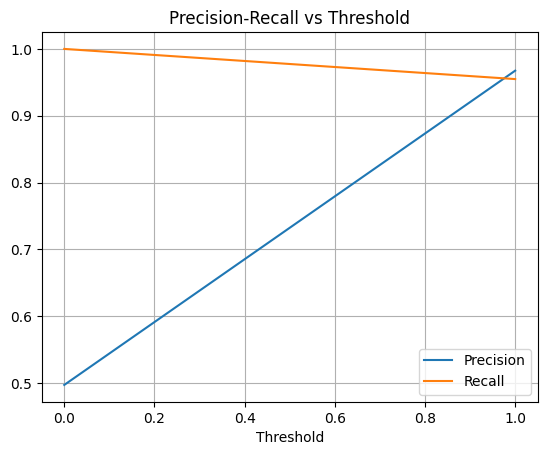

In [32]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

plt.plot(thresholds, precision[:-1], label="Precision")
plt.plot(thresholds, recall[:-1], label="Recall")
plt.xlabel("Threshold")
plt.legend()
plt.title("Precision-Recall vs Threshold")
plt.grid()
plt.show()


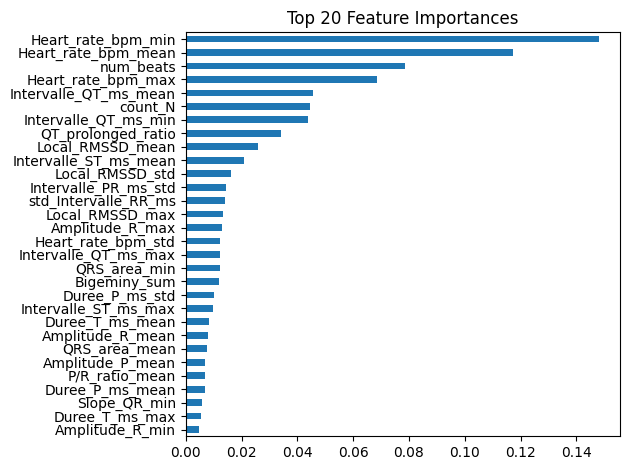

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

importances = rf_clf.feature_importances_
feature_names = X_train.columns
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

# Top 20 features
feat_imp.head(30).plot(kind='barh', title='Top 20 Feature Importances')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


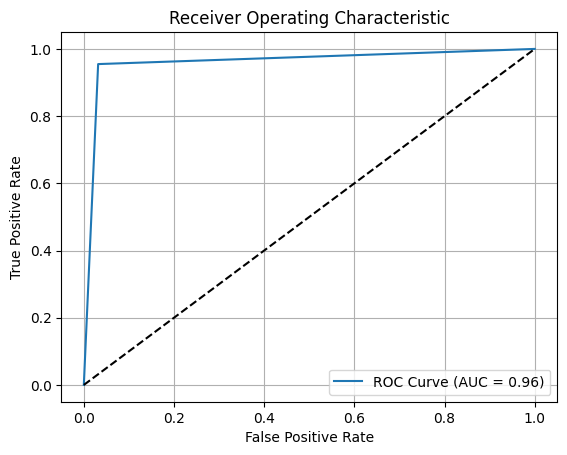

In [34]:
from sklearn.metrics import roc_auc_score, roc_curve

roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, _ = roc_curve(y_test, y_pred)

plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend()
plt.grid()
plt.show()


In [35]:
import joblib

# Save model
joblib.dump(rf_clf, 'sinus_tachycardia_vs_else_model.pkl')
print("Model saved successfully!")

Model saved successfully!


# diases 2: '426761007': supraventricular tachycardia

In [36]:
from collections import Counter
from itertools import chain
import ast
# Assuming df["dx"] contains lists
arr5 = [origin_comp_df,origin_mitbih_df,origin_ecgarr_df]
sign_df3 = pd.concat(arr5, ignore_index=True)

# If "Dx" entries are strings like "[164934002, 427084000]"
parsed_dx_lists = sign_df3["Dx"].apply(ast.literal_eval)

# Flatten and count
code_counts = Counter(chain.from_iterable(parsed_dx_lists))

# Print how many times 164934002 appears
print(code_counts)

Counter({'426783006': 52566, '426177001': 25733, '164934002': 14606, '427084000': 12605, '164890007': 11671, '39732003': 8258, '55827005': 7622, '55930002': 6757, '164865005': 6187, '164889003': 5999, '428750005': 5188, '59931005': 5154, '427393009': 4819, '164873001': 4653, '429622005': 4311, '270492004': 4016, '284470004': 3571, '164951009': 3389, '59118001': 3318, '164930006': 2605, '164861001': 2559, '164917005': 2520, '445118002': 2346, '713427006': 2204, '698252002': 2083, '111975006': 2073, '251146004': 2032, '713426002': 1955, '10370003': 1952, '164884008': 1943, '427172004': 1734, '47665007': 1644, '164909002': 1389, '67741000119109': 1300, '164867002': 1167, '426761007': 1060, '425623009': 1043, '61721007': 916, '365413008': 888, '17338001': 776, '164931005': 715, '6374002': 678, '425419005': 670, '428417006': 646, '54329005': 496, '713422000': 461, '164947007': 419, '233917008': 417, '89792004': 386, '426434006': 325, '733534002': 311, '106068003': 311, '251223006': 307, '42

In [37]:
sign_df3_ab = sign_df3[sign_df3["Class"] != 0]
print(len(sign_df3_ab))


74415


In [38]:
sign_df3_ab["Class"] = None

/tmp/ipykernel_13/1236508171.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sign_df3_ab["Class"] = None


In [39]:
sign_df3_ab["Dx"] = sign_df3_ab["Dx"].apply(ast.literal_eval)

# Define a function to classify based on Dx codes
def assign_class(dx_list):
    if "426761007" in dx_list:
        return 0
    else:
        return 1  # Or some default value

# Apply the function to assign the Class column
sign_df3_ab["Class"] = sign_df3_ab["Dx"].apply(assign_class)

/tmp/ipykernel_13/1975294185.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sign_df3_ab["Dx"] = sign_df3_ab["Dx"].apply(ast.literal_eval)
/tmp/ipykernel_13/1975294185.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sign_df3_ab["Class"] = sign_df3_ab["Dx"].apply(assign_class)


In [40]:
sign_df3_ab["Class"].value_counts()


Class
1    73358
0     1057
Name: count, dtype: int64

In [41]:

df_full = sign_df3_ab
df_full["Class"].value_counts()


Class
1    73358
0     1057
Name: count, dtype: int64

In [42]:

mask = df_full.drop(columns=["Age", "Sex"]).isnull().any(axis=1)
df_with_nulls = df_full[mask]
# Drop those rows from the original dataframe
df_full = df_full[~mask].reset_index(drop=True)

df_full["Class"].value_counts()
df_balanced = df_full

In [43]:
from sklearn.utils import resample

df = df_full
# Separate the two classes
df_major = df[df['Class'] == 1]
df_minor = df[df['Class'] == 0]

# Downsample the majority class
df_major_downsampled = resample(df_major,
                                replace=False,     # without replacement
                                n_samples=len(df_minor),
                                random_state=42)   # reproducibility

# Combine balanced dataset
df_balanced = pd.concat([df_major_downsampled, df_minor])
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# balancing

In [44]:
df_balanced["Class"].value_counts()

Class
0    1053
1    1053
Name: count, dtype: int64

In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score , confusion_matrix

# Assuming df_full already has the 'is_normal' column for classification
# Define X and y
X = df_balanced.drop(columns=['record_name','Sex','Age',"Dx",'Class'])  # Features: exclude 'is_normal' column

y = df_balanced['Class']  # Target: 'is_normal'
print(y.value_counts())
print(X.columns)
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



Class
0    1053
1    1053
Name: count, dtype: int64
Index(['Duree_QRS_ms_mean', 'Duree_QRS_ms_std', 'Duree_QRS_ms_min',
       'Duree_QRS_ms_max', 'Duree_P_ms_mean', 'Duree_P_ms_std',
       'Duree_P_ms_min', 'Duree_P_ms_max', 'Duree_T_ms_mean', 'Duree_T_ms_std',
       'Duree_T_ms_min', 'Duree_T_ms_max', 'Intervalle_QT_ms_mean',
       'Intervalle_QT_ms_std', 'Intervalle_QT_ms_min', 'Intervalle_QT_ms_max',
       'Intervalle_PR_ms_mean', 'Intervalle_PR_ms_std', 'Intervalle_PR_ms_min',
       'Intervalle_PR_ms_max', 'Intervalle_ST_ms_mean', 'Intervalle_ST_ms_std',
       'Intervalle_ST_ms_min', 'Intervalle_ST_ms_max', 'Amplitude_P_mean',
       'Amplitude_P_std', 'Amplitude_P_min', 'Amplitude_P_max',
       'Amplitude_Q_mean', 'Amplitude_Q_std', 'Amplitude_Q_min',
       'Amplitude_Q_max', 'Amplitude_R_mean', 'Amplitude_R_std',
       'Amplitude_R_min', 'Amplitude_R_max', 'Amplitude_S_mean',
       'Amplitude_S_std', 'Amplitude_S_min', 'Amplitude_S_max',
       'Amplitude_T_mean', 'Amp

In [46]:

# Initialize a RandomForestClassifier
rf_clf =  RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)

# Train the model
rf_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_clf.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.9597
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       201
           1       0.97      0.95      0.96       221

    accuracy                           0.96       422
   macro avg       0.96      0.96      0.96       422
weighted avg       0.96      0.96      0.96       422

[[195   6]
 [ 11 210]]


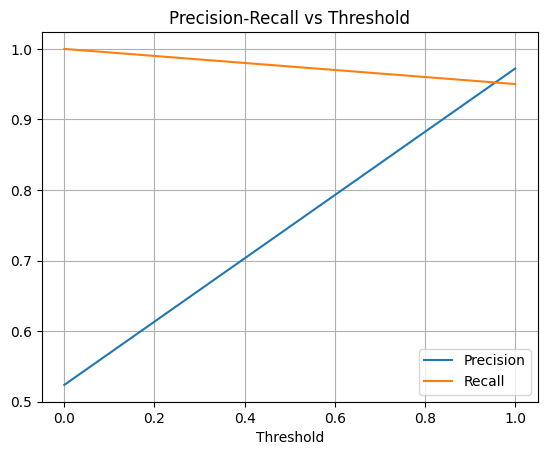

In [47]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

plt.plot(thresholds, precision[:-1], label="Precision")
plt.plot(thresholds, recall[:-1], label="Recall")
plt.xlabel("Threshold")
plt.legend()
plt.title("Precision-Recall vs Threshold")
plt.grid()
plt.show()


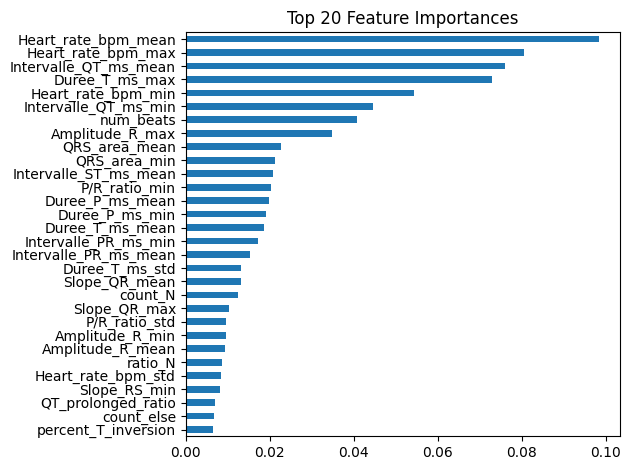

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

importances = rf_clf.feature_importances_
feature_names = X_train.columns
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

# Top 20 features
feat_imp.head(30).plot(kind='barh', title='Top 20 Feature Importances')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [49]:
import joblib

# Save model
joblib.dump(rf_clf, 'supraventricular_tachycardia_vs_else_model.pkl')
print("Model saved successfully!")

Model saved successfully!


# diases 3: '427393009' sinus arrhythmia

In [50]:
from collections import Counter
from itertools import chain
import ast
# Assuming df["dx"] contains lists
arr5 = [origin_comp_df,origin_mitbih_df,origin_ecgarr_df]
sign_df3 = pd.concat(arr5, ignore_index=True)

# If "Dx" entries are strings like "[164934002, 427084000]"
parsed_dx_lists = sign_df3["Dx"].apply(ast.literal_eval)

# Flatten and count
code_counts = Counter(chain.from_iterable(parsed_dx_lists))

# Print how many times 164934002 appears
print(code_counts)

Counter({'426783006': 52566, '426177001': 25733, '164934002': 14606, '427084000': 12605, '164890007': 11671, '39732003': 8258, '55827005': 7622, '55930002': 6757, '164865005': 6187, '164889003': 5999, '428750005': 5188, '59931005': 5154, '427393009': 4819, '164873001': 4653, '429622005': 4311, '270492004': 4016, '284470004': 3571, '164951009': 3389, '59118001': 3318, '164930006': 2605, '164861001': 2559, '164917005': 2520, '445118002': 2346, '713427006': 2204, '698252002': 2083, '111975006': 2073, '251146004': 2032, '713426002': 1955, '10370003': 1952, '164884008': 1943, '427172004': 1734, '47665007': 1644, '164909002': 1389, '67741000119109': 1300, '164867002': 1167, '426761007': 1060, '425623009': 1043, '61721007': 916, '365413008': 888, '17338001': 776, '164931005': 715, '6374002': 678, '425419005': 670, '428417006': 646, '54329005': 496, '713422000': 461, '164947007': 419, '233917008': 417, '89792004': 386, '426434006': 325, '733534002': 311, '106068003': 311, '251223006': 307, '42

In [51]:
sign_df3_ab = sign_df3[sign_df3["Class"] != 0]
sign_df3_ab["Class"] = None

/tmp/ipykernel_13/2997288717.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sign_df3_ab["Class"] = None


In [52]:
sign_df3_ab["Dx"] = sign_df3_ab["Dx"].apply(ast.literal_eval)

# Define a function to classify based on Dx codes
def assign_class(dx_list):
    if "427393009" in dx_list:
        return 0
    else:
        return 1  # Or some default value

# Apply the function to assign the Class column
sign_df3_ab["Class"] = sign_df3_ab["Dx"].apply(assign_class)

/tmp/ipykernel_13/2230923197.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sign_df3_ab["Dx"] = sign_df3_ab["Dx"].apply(ast.literal_eval)
/tmp/ipykernel_13/2230923197.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sign_df3_ab["Class"] = sign_df3_ab["Dx"].apply(assign_class)


In [53]:

df_full = sign_df3_ab
df_full["Class"].value_counts()

Class
1    70321
0     4094
Name: count, dtype: int64

In [54]:

mask = df_full.drop(columns=["Age", "Sex"]).isnull().any(axis=1)
df_with_nulls = df_full[mask]
# Drop those rows from the original dataframe
df_full = df_full[~mask].reset_index(drop=True)

df_full["Class"].value_counts()
df_balanced = df_full

In [55]:
from sklearn.utils import resample

df = df_full
# Separate the two classes
df_major = df[df['Class'] == 1]
df_minor = df[df['Class'] == 0]

# Downsample the majority class
df_major_downsampled = resample(df_major,
                                replace=False,     # without replacement
                                n_samples=len(df_minor),
                                random_state=42)   # reproducibility

# Combine balanced dataset
df_balanced = pd.concat([df_major_downsampled, df_minor])
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# balancing

In [56]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score , confusion_matrix

# Assuming df_full already has the 'is_normal' column for classification
# Define X and y
X = df_balanced.drop(columns=['record_name','Sex','Age',"Dx",'Class'])  # Features: exclude 'is_normal' column

y = df_balanced['Class']  # Target: 'is_normal'
print(y.value_counts())
print(X.columns)
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



Class
1    4094
0    4094
Name: count, dtype: int64
Index(['Duree_QRS_ms_mean', 'Duree_QRS_ms_std', 'Duree_QRS_ms_min',
       'Duree_QRS_ms_max', 'Duree_P_ms_mean', 'Duree_P_ms_std',
       'Duree_P_ms_min', 'Duree_P_ms_max', 'Duree_T_ms_mean', 'Duree_T_ms_std',
       'Duree_T_ms_min', 'Duree_T_ms_max', 'Intervalle_QT_ms_mean',
       'Intervalle_QT_ms_std', 'Intervalle_QT_ms_min', 'Intervalle_QT_ms_max',
       'Intervalle_PR_ms_mean', 'Intervalle_PR_ms_std', 'Intervalle_PR_ms_min',
       'Intervalle_PR_ms_max', 'Intervalle_ST_ms_mean', 'Intervalle_ST_ms_std',
       'Intervalle_ST_ms_min', 'Intervalle_ST_ms_max', 'Amplitude_P_mean',
       'Amplitude_P_std', 'Amplitude_P_min', 'Amplitude_P_max',
       'Amplitude_Q_mean', 'Amplitude_Q_std', 'Amplitude_Q_min',
       'Amplitude_Q_max', 'Amplitude_R_mean', 'Amplitude_R_std',
       'Amplitude_R_min', 'Amplitude_R_max', 'Amplitude_S_mean',
       'Amplitude_S_std', 'Amplitude_S_min', 'Amplitude_S_max',
       'Amplitude_T_mean', 'Amp

In [57]:

# Initialize a RandomForestClassifier
rf_clf =  RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)

# Train the model
rf_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_clf.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.9170
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.92      0.91       797
           1       0.92      0.92      0.92       841

    accuracy                           0.92      1638
   macro avg       0.92      0.92      0.92      1638
weighted avg       0.92      0.92      0.92      1638

[[730  67]
 [ 69 772]]


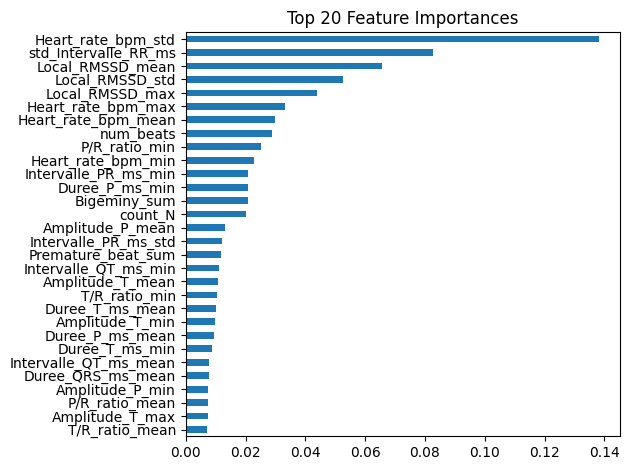

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

importances = rf_clf.feature_importances_
feature_names = X_train.columns
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

# Top 20 features
feat_imp.head(30).plot(kind='barh', title='Top 20 Feature Importances')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [59]:
import joblib

# Save model
joblib.dump(rf_clf, 'sinus arrhythmia_vs_else_model.pkl')
print("Model saved successfully!")

Model saved successfully!
